2024-12-23 14:53:58.499930: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


2024-12-23 14:54:05.606406: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


1681/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8717 - loss: 0.4464

2024-12-23 14:54:11.163850: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18816000 exceeds 10% of free system memory.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8719 - loss: 0.4455 - val_accuracy: 0.9703 - val_loss: 0.1062
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9671 - loss: 0.1076 - val_accuracy: 0.9720 - val_loss: 0.0912
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9777 - loss: 0.0732 - val_accuracy: 0.9747 - val_loss: 0.0868
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9833 - loss: 0.0553 - val_accuracy: 0.9753 - val_loss: 0.0820
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9871 - loss: 0.0411 - val_accuracy: 0.9775 - val_loss: 0.0776
102/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 0.0900

2024-12-23 14:54:36.176444: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9703 - loss: 0.0938
Test accuracy: 0.974
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


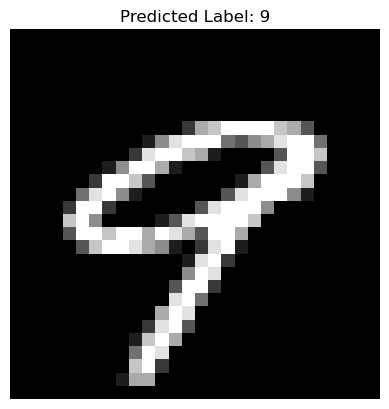

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalizar y redimensionar
X_train = X_train.reshape((-1, 28*28)).astype('float32') / 255.0
X_test = X_test.reshape((-1, 28*28)).astype('float32') / 255.0

# Construir el modelo
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluar
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

# Seleccionar una imagen aleatoria del conjunto de prueba
random_idx = np.random.randint(0, X_test.shape[0])
random_image = X_test[random_idx].reshape(28, 28)  # Redimensionamos a 28x28 para mostrarla

# Hacer una predicción
random_image_flattened = random_image.reshape(1, 28*28)  # Aplanamos para pasarla al modelo
predicted_label = np.argmax(model.predict(random_image_flattened))

# Mostrar la imagen y la predicción
plt.imshow(random_image, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
